# Part A

### 1. Project environment & packages

In [2]:
using Pkg
Pkg.activate("..")

using DrWatson
@quickactivate "FE2P1SvobodaVlach"

  Activating project at `C:\Users\František Vlach\F_link\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach`


In [3]:
#Pkg.add("MarketData")
#Pkg.add("Dates")
#Pkg.add("DataFrames")
# Pkg.add("StatsPlots")
# Pkg.add("ARCHModels")

using MarketData
using Dates
using DataFrames
using StatsPlots
using ARCHModels

   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`


In [4]:
# Pkg.add("GLM")
# Pkg.add("Plots")
# Pkg.add("Random")

using GLM 
using Plots 
using Random 

   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`


In [5]:
# Pkg.add("Flux")
# Pkg.add("Optim")
# Pkg.add("Statistics")

using Flux 
using Optim 
using Statistics 

   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`


### 2. Download data for Apple

In [6]:
ticker = "AAPL"

start_date = DateTime(2023, 1, 1)
stop_date = DateTime(2024, 1, 1)

2024-01-01T00:00:00

In [7]:
data_apple = DataFrame(yahoo(ticker, YahooOpt(period1 = start_date, period2 = stop_date)));

### 3. Summary statistics & plots

In [8]:
first(data_apple, 3)

Row,timestamp,Open,High,Low,Close,AdjClose,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2023-01-03,130.28,130.9,124.17,125.07,123.905,1.12118e8
2,2023-01-04,126.89,128.66,125.08,126.36,125.183,8.91136e7
3,2023-01-05,127.13,127.77,124.76,125.02,123.855,8.09627e7


In [9]:
typeof(data_apple)

DataFrame

In [10]:
size(data_apple)

(250, 7)

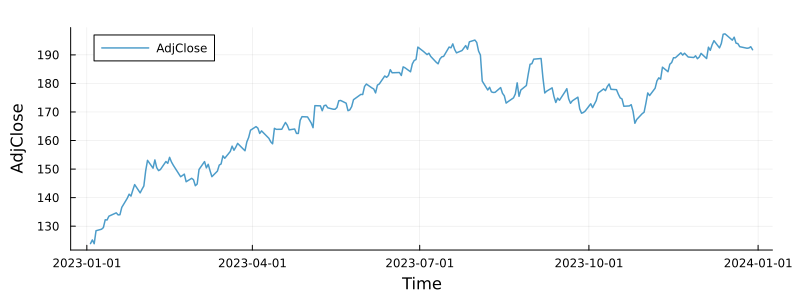

In [34]:
plot(data_apple.timestamp, data_apple.AdjClose, 
    line=(1.5, 0.7, :solid), size=(800,300), palette=:seaborn_colorblind,
    label="AdjClose", xlabel="Time", ylabel="AdjClose", 
    margin=5Plots.mm)

# savefig(plotsdir("apple_adjclose.png")) # Save to "plots/"

In [12]:
summary_stats = describe(data_apple[:, :AdjClose])

Summary Stats:
Length:         250
Missing Count:  0
Mean:           171.470439
Std. Deviation: 17.437952
Minimum:        123.855087
1st Quartile:   160.847202
Median:         174.581650
3rd Quartile:   186.470249
Maximum:        197.361084
Type:           Float64


### 4. Model & forecast

In [13]:
# Parameters
pred_length = 10 # Number of predictions

10

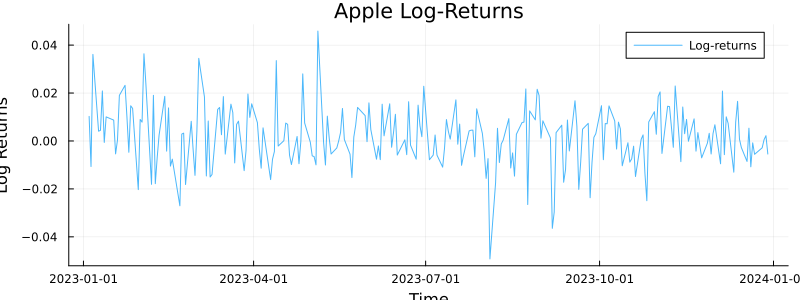

In [14]:
# Log-returns
ret_apple = DataFrame(
    returns = diff(log.(data_apple[:, :AdjClose])),
    timestamp = data_apple.timestamp[2:end]
)

plot(ret_apple.timestamp, ret_apple.returns,
    line=(1, 0.7), size=(800,300),
    xlabel="Time", ylabel="Log Returns",
    title="Apple Log-Returns", label="Log-returns"
)

# savefig(plotsdir("apple_logreturns.png")) # Save to "plots/"

In [15]:
# Autocoorelation function -> used on prices or returns???
plot(autocor(ret_apple.returns, 1:20),
    seriestype=:bar, 
    xlabel="Lag", 
    ylabel="Autocorrelation", 
    title="Autocorrelation Function for Apple Returns")

savefig(plotsdir("apple_autocor.png")) # Save to "plots/"

"C:\\Users\\František Vlach\\F_link\\IES\\Financial_econometrics_II\\Project\\FE2P1SvobodaVlach\\plots\\apple_autocor.png"

In [16]:
# Train-test split
train_apple = ret_apple[1:end-pred_length, :]
test_apple = ret_apple[end-pred_length+1:end, :]

Row,returns,timestamp
,Float64,Date
1,-0.00272951,2023-12-15
2,-0.00853965,2023-12-18
3,0.00534586,2023-12-19
4,-0.0107717,2023-12-20
5,-0.000770337,2023-12-21
6,-0.00556291,2023-12-22
7,-0.00284491,2023-12-26
8,0.000517801,2023-12-27
9,0.00222378,2023-12-28


In [17]:
# Fit
garch_fit = fit(GARCH{1,1}, train_apple.returns)


GARCH{1, 1} model with Gaussian errors, T=239.

Mean equation parameters:
────────────────────────────────────────────
    Estimate    Std.Error  z value  Pr(>|z|)
────────────────────────────────────────────
μ  0.0019609  0.000832066  2.35667    0.0184
────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   8.97295e-6  1.86885e-5  0.480132    0.6311
β₁  0.936012    0.128393    7.29023     <1e-12
α₁  0.00649413  0.031429    0.206628    0.8363
──────────────────────────────────────────────


In [18]:
garch_pred = predict.(garch_fit, :return, 1:pred_length) #TODO: This is probably not right 

10-element Vector{Float64}:
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506

### 5. Forecasts plot

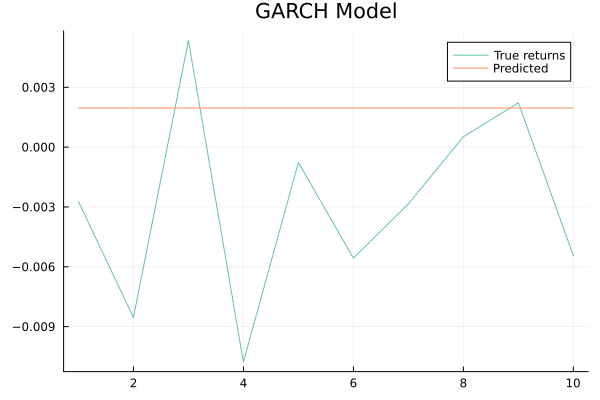

In [35]:
p1 = plot(test_apple.returns, lab="True returns", leg=:topright, title="GARCH Model", palette=:Set2_3)
p1 = plot!(garch_pred, lab="Predicted")

In [36]:
garch_pred

10-element Vector{Float64}:
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506
 0.0019609041482991506

# Part B

In [20]:
""" Create HAR regressors """
function HAR_regressors(data)

    RVd = data[22:end-1] # days
    RVw = zeros(length(RVd)) # weeks
    for i in 22:(length(data)-1)
       temp = 0
       for h in 0:4
           temp = temp + data[i-h]
       end
       RVw[i-21]= temp / 5
    end
    
    RVm = zeros(length(RVd)) # months
    for i in 22:(length(data)-1) 
       temp = 0
       for h in 0:21
           temp = temp + data[i-h]
       end
       RVm[i-21] = temp / 22;
    end

    return [RVd RVw RVm]
end

HAR_regressors

In [21]:
function OLSestimatorconst(y,x)
    x = [ones(size(x)[1]) x]
    return (transpose(x) * x) \ (transpose(x) * y)
end

OLSestimatorconst (generic function with 1 method)

In [22]:
OLSestimatorconst(train_apple[23:end,1], HAR_regressors(train_apple[:,1]))

4-element Vector{Float64}:
  0.0016350307826101082
  0.07532328940906338
 -0.1349317522133795
 -0.2392745495411129

In [39]:
train_apple

Row,returns,timestamp
,Float64,Date
1,0.0102614,2023-01-04
2,-0.0106613,2023-01-05
3,0.0361333,2023-01-06
4,0.00408061,2023-01-09
5,0.00444641,2023-01-10
6,0.0208924,2023-01-11
7,-0.000599472,2023-01-12
8,0.0100684,2023-01-13
9,0.00871843,2023-01-17


In [50]:
target = ret_apple[:,1]
predictors = HAR_regressors(ret_apple[:,1]);

In [51]:
describe(DataFrame(predictors, [:rv_d, :rv_w, :rv_m]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,rv_d,0.00112413,-0.0492113,0.00126583,0.045859,0,Float64
2,rv_w,0.00127185,-0.018772,0.00152665,0.0138679,0,Float64
3,rv_m,0.00156109,-0.00501342,0.00186628,0.00966777,0,Float64


In [52]:
size(target), size(predictors)

((249,), (227, 3))

In [45]:
using Plots
using Plots.Measures
gr(; fmt = "svg", dpi=72, fontfamily="Arial", framestyle=:box, 
    size=(500 * 1.618, 500), thickness_scaling = 1.1, palette=:seaborn_colorblind, margin=3mm)

Plots.GRBackend()

In [53]:
# training set 
# OLSestimatorconst(RVPX[23:end],HAR_regressors(RVPX)) # how har defines regressors and how yt+1 is defined :)
# ___ verify the horizon we forecast 22 or 23 starting index?
xtrain = predictors[1:200,:] |> permutedims .|> Float32
ytrain = target[23:222] |> permutedims .|> Float32
# validation set # here was a problem with forecasting
xvalid = predictors[201:227,:] |> permutedims .|> Float32
yvalid = target[223:249] |> permutedims .|> Float32;

In [54]:
size(xtrain), size(ytrain) 

((3, 200), (1, 200))

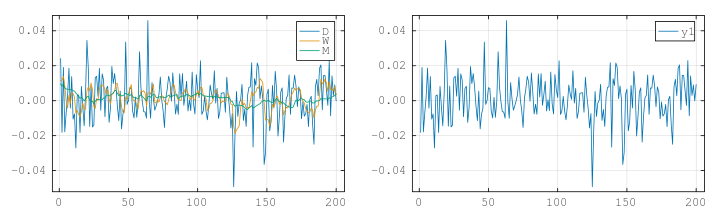

In [55]:
plot(plot(xtrain', labels=["D" "W" "M"]), plot(ytrain'), size=(1000,300))

In [57]:
# plot(plot(sqrt.(xtrain)'), plot(ytrain'), size=(800,300))

In [58]:
function our_train(x_train, y_train, x_valid, y_valid; nodes=[5,2], eta=0.001, n_epochs=100)
    # _ data
    # xtrain (3, T)
    # ytrain (1, T)
    
    # _ model
    neural_net = Chain(
                        Dense(size(x_train,1),  nodes[1]),
                        Dense(nodes[1], nodes[2]),
                        Dense(nodes[2], size(y_train,1)),
    )
    
    # _ loss
    loss(x, y) = Flux.Losses.mse(neural_net(x), y)
    
    # _ optimization
    opt = Descent(eta)
    # _ opt = ADAM(eta)
    
    # _ params 
    my_params = Flux.params(neural_net)
    orig_params = deepcopy(my_params)
    
    # _ reporting 
    losses_train = []
    losses_valid = []
    
    # _ Train loop over the data
    for epoch in 1:n_epochs
        # training
        Flux.train!(loss, my_params, [(x_train, y_train)], opt)
        # reporting
        push!(losses_train, loss(x_train, y_train))
        push!(losses_valid, loss(x_valid, y_valid))
        epoch % 20 == 0 ? println("Epoch $epoch \t Loss: ", losses_train[end], " \t Test: ", losses_valid[end]) : nothing
    end
    
    return neural_net, losses_train, losses_valid
end 

our_train (generic function with 1 method)

In [59]:
model_trained0, losses01, losses02 = our_train(xtrain, ytrain, xvalid, yvalid; nodes=[50,50], eta=0.001, n_epochs=100);

Epoch 20 	 Loss: 0.00019926339 	 Test: 5.6265828e-5
Epoch 40 	 Loss: 0.00019920313 	 Test: 5.6492296e-5
Epoch 60 	 Loss: 0.00019916362 	 Test: 5.668259e-5
Epoch 80 	 Loss: 0.00019913726 	 Test: 5.6840636e-5
Epoch 100 	 Loss: 0.00019911943 	 Test: 5.697078e-5


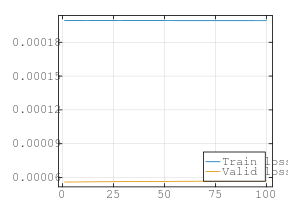

In [66]:
plot([losses01 losses02], labels=["Train loss" "Valid loss"], size=(400,300)) 

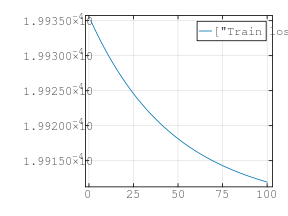

In [65]:
plot([losses01], labels=["Train loss"], size=(400,300)) 

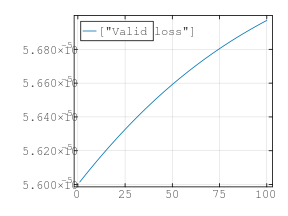

In [67]:
plot([losses02], labels=["Valid loss"], size=(400,300)) 

In [68]:
losses01

100-element Vector{Any}:
 0.00019935032f0
 0.00019934477f0
 0.00019933937f0
 0.00019933408f0
 0.00019932892f0
 0.00019932387f0
 0.0001993189f0
 0.00019931408f0
 0.00019930933f0
 0.00019930465f0
 0.00019930012f0
 0.00019929571f0
 0.00019929133f0
 ⋮
 0.0001991284f0
 0.00019912753f0
 0.00019912662f0
 0.00019912579f0
 0.00019912494f0
 0.0001991241f0
 0.00019912329f0
 0.00019912249f0
 0.0001991217f0
 0.00019912094f0
 0.00019912017f0
 0.00019911943f0

In [63]:
# Pkg.add("StatsBase")

using StatsBase

   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`
